In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file
import ppscore as pps
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import itertools
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import optuna
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

ModuleNotFoundError: No module named 'pandas_profiling'

# Análisis exploratorio "Ordenes de compra PORTAL 1K"

El objetivo del análisis exploratorio de datos es resumir y visualizar las principales características del conjunto de datos para extraer, entender y establecer relación entre variables. Busca determinar las características de mayor impacto a partir de la aplicación de técnicas como:

<ol>
  <li> Estadística descriptiva</li>
  <li> Agrupamiento</li>  
  <li> Correlación</li>
  <li> Análisis de variaciones</li>
</ol>

# Acerca del DataSet

El DataSet "Ordenes de compra PORTAL 1K" corresponde a una muestra de transacciones que realizan los compradores a los proveedores en el portal para los diferentes productos y servicios. Contiene tanto variables numéricas como categóricas. La información de las variables y su contenido se presentan a continuación:

 NÚMERO PEDIDO           
 ORDEN NÚMERO           
 FECHA ORDEN            
 FECHA ENTREGA          
 FECHA APROBACIÓN       
 CATEGORÍA              
 SUBCATEGORÍA           
 PROVEEDOR              
 USUARIO                
 USUARIO APROBADOR      
 DIRECCIÓN DE  ENTREGA  
 DIRECCIÓN FACTURACIÓN  
 CENTRO COSTO           
 PRESUPUESTO            
 comPAÑÍA comPRADORA    
 ESTADO                 
 PRODUCTO O SERVICIO    
 CÓDIGO PRODUCTO        
 CANTIDAD PEDIDA        
 CANTIDAD RECIBIDA      
 PRECIO UNITARIO        
 PRECIO UNITARIO + IVA  
 IVA                    
 TOTAL SIN IVA          
 TOTAL + IVA            
 FECHA ÚLTIMO MOVIMIENTO


In [2]:
#Read Dataset
#pd.set_option("display.max_columns",40)
df = pd.read_csv(r"D:\Ordenes_de_compra_PORTAL_1K.csv", sep=',', header= 0, na_values = ["  "],encoding='latin-1')
df.head()

,NÚMERO PEDIDO,ORDEN NÚMERO,FECHA ORDEN,FECHA ENTREGA,FECHA APROBACION,CATEGORÍA,SUBCATEGORIA,PROVEEDOR,USUARIO,USUARIO APROBADOR,...,PRODUCTO O SERVICIO,CODIGO PORTAL,CANTIDAD PEDIDA,CANTIDAD RECIBIDA,PRECIO UNITARIO,PRECIO UNITARIO + IVA,IVA,TOTAL SIN IVA,TOTAL + IVA,FECHA ULTIMO MOVIMIENTO
0,# 49561,# 2582,11/10/2021,11/10/2021,11/10/2021,Eléctricos y Electrónicos,Lámparas y bombillas y componentes para lámparas,Proveedor 1,Usuario solicitante 1,Usuario Aprobador 1,...,PANEL LED SOBREPONER 24W REDONDO LUZ BLANCA,1.20E+12,2.0,NaN,23364,27803,4439,46728,55606,11/10/2021
1,# 49560,# 2581,11/10/2021,11/11/2021,11/10/2021,Mercadeo y publicidad,Publicidad,Proveedor 2,Usuario solicitante 2,Usuario Aprobador 2,...,ACTIVIDADES COMERCIALES,1K15774,1.0,1.0,1476972,1757597,280625,1476972,1757597,11/10/2021
2,# 49559,# 2580,11/10/2021,11/10/2021,11/10/2021,Alimentos y Bebidas,Alimentos preparados y conservados,Proveedor 3,Usuario solicitante 3,Usuario Aprobador 3,...,Lasagna,1K7609,10.0,NaN,155,155,0,155,155,11/10/2021
3,# 49558,# 1892,11/10/2021,11/12/2021,11/10/2021,Alimentos y Bebidas,Productos de carne y aves de corral,Proveedor 4,Usuario solicitante 4,Usuario Aprobador 4,...,Pecho de Res Limpio/Sin Grasa,1K15459,50.0,NaN,22,22,0,1100000,1100000,11/10/2021
4,# 49557,# 1,11/10/2021,11/9/2021,11/10/2021,Imprenta y litografía,Otra,Proveedor 5,Usuario solicitante 5,Usuario Aprobador 5,...,"LIBRO CABEZA, CORAZON Y MANOS",1K15761,7.0,7.0,92084,10958,17496,644588,76706,11/10/2021


In [3]:
df.rename(columns={'NÚMERO PEDIDO': 'Numero_Pedido',
                  'ORDEN NÚMERO': 'Orden_Numero',
                  'FECHA ORDEN': 'Fecha_Orden',
                  'FECHA ENTREGA': 'Fecha_Entrega',
                  'FECHA APROBACION': 'Fecha_Aprobacion',
                  'CATEGORÍA': 'Categoria',
                  'SUBCATEGORIA': 'Subcategoria',
                  'PROVEEDOR': 'Proveedor',
                  'USUARIO': 'Usuario',
                  'USUARIO APROBADOR': 'Usuario_Aprobador',
                  'DIRECCION PEDIDO': 'Direccion_Pedido',
                  'DIRECCION FACTURACION': 'Direccion_Facturacion',
                  'CENTRO DE COSTOS': 'Centro_Costos',
                  'PRESUPUESTO': 'Presupuesto',
                  'PORTAL': 'Portal',
                  'ESTADO': 'Estado',
                  'PRODUCTO O SERVICIO': 'Producto_Servicio',
                  'CODIGO PORTAL': 'Codigo_Producto',
                  'CANTIDAD PEDIDA': 'Cantidad_Pedida',
                  'CANTIDAD RECIBIDA': 'Cantidad_Recibida',
                  'PRECIO UNITARIO': 'Precio_Unitario',
                  'PRECIO UNITARIO + IVA': 'Precio_Unitario_IVA',
                  'IVA': 'IVA',
                  'TOTAL SIN IVA': 'Total_Sin_IVA',
                  'TOTAL + IVA': 'Total_IVA',
                  'FECHA ULTIMO MOVIMIENTO': 'Fecha_Ultimo_Movimiento'}, inplace=True)

In [4]:
# cambio formato fechas
df['Fecha_Orden'] = pd.to_datetime(df['Fecha_Orden'], format = "%m/%d/%Y")
df['Fecha_Entrega'] = pd.to_datetime(df['Fecha_Entrega'], format = "%m/%d/%Y")
df['Fecha_Aprobacion'] = pd.to_datetime(df['Fecha_Aprobacion'], format = "%m/%d/%Y")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23083 entries, 0 to 23082
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Numero_Pedido            23083 non-null  object        
 1   Orden_Numero             23083 non-null  object        
 2   Fecha_Orden              23083 non-null  datetime64[ns]
 3   Fecha_Entrega            18770 non-null  datetime64[ns]
 4   Fecha_Aprobacion         21950 non-null  datetime64[ns]
 5   Categoria                23083 non-null  object        
 6   Subcategoria             23083 non-null  object        
 7   Proveedor                23083 non-null  object        
 8   Usuario                  23083 non-null  object        
 9   Usuario_Aprobador        21950 non-null  object        
 10  Direccion_Pedido         23083 non-null  object        
 11  Direccion_Facturacion    10828 non-null  object        
 12  Centro_Costos            16672 n

In [ ]:
df.describe().T

In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

In [ ]:
profile

In [6]:
%matplotlib inline

In [ ]:
plt.figure(figsize=(20,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()
#plt.savefig("matixdf_full.png")

In [7]:
# campos eliminados despues de revision de matrix de correlacion
df.drop(["Precio_Unitario_IVA","Cantidad_Recibida", "Total_Sin_IVA", "IVA", "Codigo_Producto", "Direccion_Facturacion", "Centro_Costos", "Numero_Pedido", "Orden_Numero"], axis=1, inplace = True)

#### Data Cleaning

In [8]:
d3_Cantidad_Pedida = df['Cantidad_Pedida'].mean() + 3*df['Cantidad_Pedida'].std()
d3_Precio_Unitario = df['Precio_Unitario'].mean() + 3*df['Precio_Unitario'].std()
d3_Total_IVA = df['Total_IVA'].mean() + 3*df['Total_IVA'].std()

In [9]:
df = df[(df['Cantidad_Pedida'] < d3_Cantidad_Pedida) & (df['Precio_Unitario'] < d3_Precio_Unitario) &  (df['Total_IVA'] < d3_Total_IVA)]

In [ ]:
profile2 = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile2

In [ ]:
df.groupby(["Estado"]).Cantidad_Pedida.describe()

In [ ]:
df.groupby(["Estado"]).Precio_Unitario.describe()

#### Feature Engineering

In [ ]:
-Dias_Trasncurridos_Entrega: Fecha Entrega vs Fecha Orden
-Convertir estado: Rechazado a 1 y el resto a 0

In [10]:
df["Dias_Trasncurridos_Entrega"] = (df["Fecha_Entrega"] - df["Fecha_Orden"]).dt.days

In [ ]:
df

In [11]:
## - Convertir estado: Rechazado a 1 y el resto a 0
df['Estado_label'] = 0

In [12]:
df.loc[df['Estado'] == 'Orden Rechazada', 'Estado_label'] = 1

In [ ]:
df.info()

In [ ]:
df

In [13]:
df_encoder = df.copy()

In [14]:
## cambio de variables categoricas con labelencoder
lb_encoder = LabelEncoder()
df_encoder["Categoria_label_encode"] = lb_encoder.fit_transform(df_encoder["Categoria"])
df_encoder["Subcategoria_label_encode"] = lb_encoder.fit_transform(df_encoder["Subcategoria"])
df_encoder["Proveedor_label_encode"] = lb_encoder.fit_transform(df_encoder["Proveedor"])
df_encoder["Usuario_label_encode"] = lb_encoder.fit_transform(df_encoder["Usuario"])
df_encoder["Usuario_Aprobador_label_encode"] = lb_encoder.fit_transform(df_encoder["Usuario_Aprobador"])
df_encoder["Direccion_Pedido_label_encode"] = lb_encoder.fit_transform(df_encoder["Direccion_Pedido"])
df_encoder["Presupuesto_label_encode"] = lb_encoder.fit_transform(df_encoder["Presupuesto"])
df_encoder["Portal_label_encode"] = lb_encoder.fit_transform(df_encoder["Portal"])
df_encoder["Producto_Servicio_encode"] = lb_encoder.fit_transform(df_encoder["Producto_Servicio"])

In [ ]:
plt.figure(figsize=(20,10))
corr_matrix = df_encoder.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()
#plt.savefig("matixdf_encode.png")

In [ ]:
df_encoder.info()

In [15]:
df_encoder = df_encoder.drop(['Categoria_label_encode','Fecha_Orden','Fecha_Entrega','Fecha_Aprobacion','Categoria','Subcategoria','Proveedor','Usuario','Usuario_Aprobador','Direccion_Pedido','Presupuesto','Portal','Estado','Producto_Servicio','Fecha_Ultimo_Movimiento'], axis=1)

In [ ]:
df_encoder.describe().T

In [16]:
df_encoder

,Cantidad_Pedida,Precio_Unitario,Total_IVA,Dias_Trasncurridos_Entrega,Estado_label,Subcategoria_label_encode,Proveedor_label_encode,Usuario_label_encode,Usuario_Aprobador_label_encode,Direccion_Pedido_label_encode,Presupuesto_label_encode,Portal_label_encode,Producto_Servicio_encode
0,2.0,23364,55606,0.0,0,70,0,0,0,0,0,0,2405
1,1.0,1476972,1757597,1.0,0,106,105,46,11,0,101,0,426
2,10.0,155,155,0.0,0,6,207,57,22,87,207,0,2111
3,50.0,22,1100000,2.0,0,100,314,68,33,98,305,10,2629
4,7.0,92084,76706,-1.0,0,88,330,79,43,109,875,20,2043
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23078,8.0,33613,320,NaN,0,39,132,34,65,154,863,29,1802
23079,1.0,588,700,NaN,0,39,132,34,65,154,863,29,2110
23080,3.0,29412,105,NaN,0,18,132,34,65,154,863,29,880
23081,4.0,29412,140,NaN,0,18,132,34,65,154,863,29,880


In [17]:
#features to X
df_features = df_encoder.loc[:, df_encoder.columns != 'Estado_label']
X = np.asarray(df_features)
X = np.nan_to_num(X)

In [ ]:
# normalizar con min max scaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
X

In [18]:
#labels (target) to y
y = np.asarray(df_encoder['Estado_label'])
y [0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [ ]:
# summarize class distribution
counter = Counter(y)
print(counter)

In [ ]:
# transform the dataset  SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
counter = Counter(y)
print(counter)

In [19]:
#Split Train - Test. 80%-20%
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=2, stratify=df_encoder["Estado_label"])
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (18184, 12) (18184,)
Test set: (4547, 12) (4547,)


In [ ]:
#Split Train - Test. 80%-20%
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split( X, y, test_size=0.2,random_state=2, stratify=df_encoder["Estado_label"])
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

In [ ]:
counter = Counter(y_test)
print(counter)

In [20]:
#develop matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### DecisionTree

In [24]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4, class_weight="balanced")
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4)

In [25]:
predTree = drugTree.predict(X_test)
pscores_tree = drugTree.predict_proba(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4346
           1       0.99      0.99      0.99       201

    accuracy                           1.00      4547
   macro avg       0.99      0.99      0.99      4547
weighted avg       1.00      1.00      1.00      4547

Confusion matrix, without normalization
[[4344    2]
 [   2  199]]


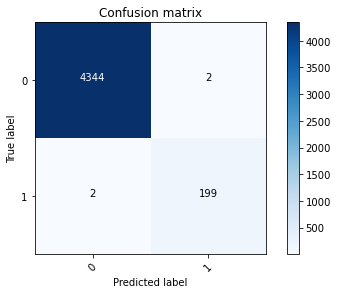

In [26]:
# Compute confusion matrix
y_pred_DT = pscores_tree[:,1]>0.7
cnf_matrix = confusion_matrix(y_test, y_pred_DT, labels = [0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred_DT))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = [0,1], normalize= False,  title='Confusion matrix')
plt.show()

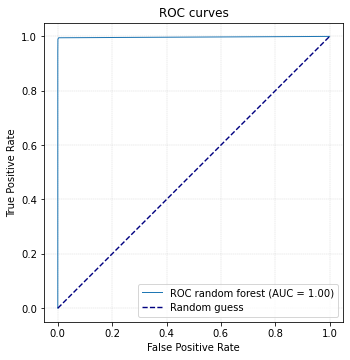

In [27]:
# DT
roc_RF = metrics.roc_curve(y_test, pscores_tree[:,1])
auc_RF = metrics.auc( roc_RF[0], roc_RF[1] )


plt.figure(figsize=(5.5,5.5))
plt.plot(roc_RF[0], roc_RF[1], lw=1,label=f"ROC random forest (AUC = {auc_RF:0.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=1.4, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc='lower right')
plt.gca().set_aspect(1)
plt.grid(ls='--', alpha=0.6, lw=0.4)
plt.show()

### Random Forest

In [28]:
#RF-
forest_class = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=4)
forest_class.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=4)

In [29]:
predforest = forest_class.predict(X_test)
pscores_forest = forest_class.predict_proba(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4346
           1       0.93      1.00      0.97       201

    accuracy                           1.00      4547
   macro avg       0.97      1.00      0.98      4547
weighted avg       1.00      1.00      1.00      4547

Confusion matrix, without normalization
[[4332   14]
 [   0  201]]


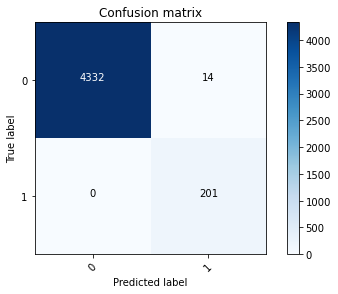

In [30]:
# Compute confusion matrix
y_pred_forest = pscores_forest[:,1]>0.2
cnf_matrix = confusion_matrix(y_test, y_pred_forest, labels = [0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred_forest))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = [0,1], normalize= False,  title='Confusion matrix')
plt.show()

In [ ]:
kf = StratifiedKFold(n_splits=10)
forest_class = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=4)
forest_class.fit(X_train, y_train)
 
score = forest_class.score(X_train,y_train)
print("Metrica del modelo", score)
scores = cross_val_score(forest_class, X_train, y_train, cv=kf, scoring="accuracy")
print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())

pscores_forest = forest_class.predict_proba(X_test)
predforest = pscores_forest[:,1]>0.2
score_pred = metrics.accuracy_score(y_test, predforest)
print("Metrica en Test", score_pred)

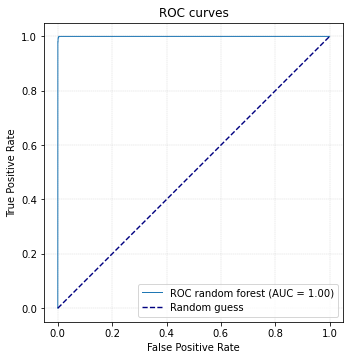

In [31]:
# DT
roc_forest = metrics.roc_curve(y_test, pscores_forest[:,1])
auc_forest = metrics.auc( roc_forest[0], roc_forest[1] )


plt.figure(figsize=(5.5,5.5))
plt.plot(roc_forest[0], roc_forest[1], lw=1,label=f"ROC random forest (AUC = {auc_RF:0.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=1.4, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc='lower right')
plt.gca().set_aspect(1)
plt.grid(ls='--', alpha=0.6, lw=0.4)
plt.show()

### SVM

In [32]:
clf = svm.SVC(kernel='rbf', C=3, probability=True, class_weight="balanced")
clf.fit(X_train, y_train)

SVC(C=3, class_weight='balanced', probability=True)

In [33]:
yhat_SVM = clf.predict(X_test)
pscores_svm = clf.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4346
           1       0.00      0.00      0.00       201

    accuracy                           0.96      4547
   macro avg       0.48      0.50      0.49      4547
weighted avg       0.91      0.96      0.93      4547

Confusion matrix, without normalization
[[4346    0]
 [ 201    0]]


C:\Users\d84088661\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\d84088661\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\d84088661\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


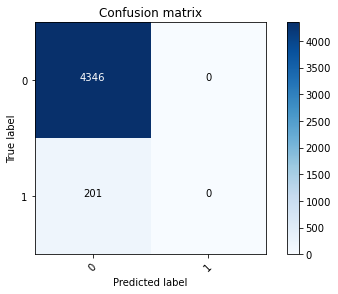

In [34]:
# Compute confusion matrix
y_pred_SVM = pscores_svm[:,1]>0.1
cnf_matrix = confusion_matrix(y_test, y_pred_SVM, labels = [0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred_SVM))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = [0,1], normalize= False,  title='Confusion matrix')
plt.show()

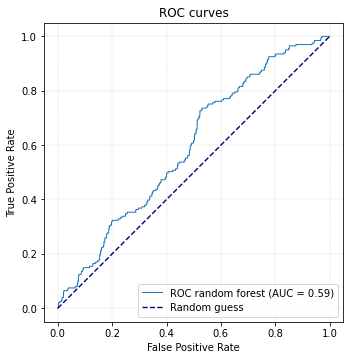

In [35]:
roc_RF = metrics.roc_curve(y_test, pscores_svm[:,1])
auc_RF = metrics.auc( roc_RF[0], roc_RF[1] )


plt.figure(figsize=(5.5,5.5))
plt.plot(roc_RF[0], roc_RF[1], lw=1,label=f"ROC random forest (AUC = {auc_RF:0.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=1.4, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc='lower right')
plt.gca().set_aspect(1)
plt.grid(ls='--', alpha=0.6, lw=0.4)

In [36]:
kf = StratifiedKFold(n_splits=5)
clf = svm.SVC(kernel='rbf', C=3, probability=True, class_weight="balanced")
clf.fit(X_train, y_train)
 
score = clf.score(X_train,y_train)
print("Metrica del modelo", score)
scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring="accuracy")
print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())

preds = clf.predict_proba(X_test)
y_pred_SVM = preds[:,1]>0.3
score_pred = metrics.accuracy_score(y_test, y_pred_SVM)
print("Metrica en Test", score_pred)

Metrica del modelo 0.18510778706555214
Metricas cross_validation [0.2  0.18 0.17 0.19 0.19]
Media de cross_validation 0.18620772992889062
Metrica en Test 0.9557950296899055


### Logistic Regresion

In [21]:
LR = LogisticRegression(C=0.05, solver='liblinear', class_weight="balanced").fit(X_train,y_train)

In [22]:
yhat_LR = LR.predict(X_test)
pscores_LR = LR.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      4346
           1       0.32      0.86      0.47       201

    accuracy                           0.91      4547
   macro avg       0.66      0.89      0.71      4547
weighted avg       0.96      0.91      0.93      4547

Confusion matrix, without normalization
[[3980  366]
 [  28  173]]


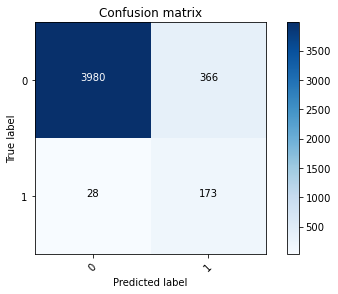

In [23]:
# Compute confusion matrix
y_pred_LR = pscores_LR[:,1]>0.65
cnf_matrix = confusion_matrix(y_test, y_pred_LR, labels = [0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred_LR))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = [0,1], normalize= False,  title='Confusion matrix')
plt.show()

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat_LR, average='weighted')

In [ ]:
roc_RF = metrics.roc_curve(y_test, pscores_LR[:,1])
auc_RF = metrics.auc( roc_RF[0], roc_RF[1] )


plt.figure(figsize=(5.5,5.5))
plt.plot(roc_RF[0], roc_RF[1], lw=1,label=f"ROC random forest (AUC = {auc_RF:0.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=1.4, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc='lower right')
plt.gca().set_aspect(1)
plt.grid(ls='--', alpha=0.6, lw=0.4)

In [ ]:
# ROC CURVES
roc_RF = metrics.roc_curve(y_test, pscores_forest[:, 1])
auc_RF = metrics.auc( roc_RF[0], roc_RF[1] )
roc_DT = metrics.roc_curve(y_test, pscores_tree[:, 1])
auc_DT = metrics.auc( roc_DT[0], roc_DT[1] )
roc_SVM = metrics.roc_curve(y_test, pscores_svm[:,1])
auc_SVM = metrics.auc( roc_SVM[0], roc_SVM[1] )
roc_LR = metrics.roc_curve(y_test, pscores_LR[:,1])
auc_LR = metrics.auc( roc_LR[0], roc_LR[1] )


plt.figure(figsize=(10,10))
line_width = 2
plt.plot(roc_LR[0], roc_LR[1], color='darkgreen', lw=line_width,
         label=f"ROC curve for Logistic Regression Classifier (AUC = {auc_LR:0.2f})")
plt.plot(roc_DT[0], roc_DT[1], color='darkred', lw=line_width,
         label=f"ROC curve for Desicion Tree Classifier (AUC = {auc_DT:0.2f})")
plt.plot(roc_SVM[0], roc_SVM[1], color='darkorange', lw=line_width,
         label=f"ROC curve for Support Vector Machine (AUC = {auc_SVM:0.2f})")
plt.plot(roc_RF[0], roc_RF[1], color='darkblue', lw=line_width,
         label=f"ROC curve for Random Forest (AUC = {auc_RF:0.2f})")

plt.plot([0, 1], [0, 1], color='gray', lw=line_width, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Classification for Enrollment in the Employment Program')
plt.legend(loc='lower right')
plt.show()

In [ ]:
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [ ]:
#ligth gb 
X_train, X_test, y_train, y_test
    
# Split training data in to training and validation sets.
# Validation set is used for early stopping.
    
X = df.drop(['Categoria_label_encode','Fecha_Orden','Fecha_Entrega','Fecha_Aprobacion','Categoria','Subcategoria','Proveedor','Usuario','Usuario_Aprobador','Direccion_Pedido','Presupuesto','Portal','Estado','Producto_Servicio','Fecha_Ultimo_Movimiento','Estado_label','Usuario_Aprobador_label_encode'], axis=1)
#X = df.drop(['Fecha_Orden','Fecha_Entrega','Fecha_Aprobacion','Fecha_Ultimo_Movimiento','Estado_label'], axis=1)
y = df['Estado_label']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=1234)
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_valid, label=y_valid, reference=train_data)

In [ ]:
X

In [ ]:
X_test

In [ ]:
## parametros para el modelo lightGBM search 
SEARCH_PARAMS = {'learning_rate': 0.4,
                'max_depth': 15,
                'num_leaves': 32,
                'feature_fraction': 0.8,
                'subsample': 0.2}

FIXED_PARAMS={'objective': 'binary',
             'metric': 'auc',
             'is_unbalance':True,
             'bagging_freq':5,
             'boosting':'dart',
             'num_boost_round':300,
             'early_stopping_rounds':30}



In [ ]:
params = {'metric':FIXED_PARAMS['metric'],
             'objective':FIXED_PARAMS['objective'],**SEARCH_PARAMS}

In [ ]:
model = lgb.train(params, train_data,                     
                     valid_sets=[valid_data],
                     num_boost_round=FIXED_PARAMS['num_boost_round'],
                     early_stopping_rounds=FIXED_PARAMS['early_stopping_rounds'],
                     valid_names=['valid'])

In [ ]:
score = model.best_score['valid']['auc']

In [ ]:
score

In [ ]:
## score de test
y_predict = model.predict(X_test)


In [ ]:
# conocer el numero de iteraciones realizadas por el modelo
num_iteration =model.best_iteration
num_iteration

In [ ]:
#convert into binary values	
for i in range(0,len(X_test)):	
    if y_predict[i]>=.7:       # setting threshold to .5	
            y_predict[i]=1
    else:
        y_predict[i]=0

In [ ]:
accuracy=accuracy_score(y_test,y_predict)

In [ ]:
accuracy

In [ ]:
print(classification_report(y_test, y_predict))

In [ ]:
#confusion Matrix
plt.figure()
cf_matrix =confusion_matrix(y_test, y_predict)
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

## Optuna 

In [ ]:
def objective(trial):
    #Split Train - Test. 80%-20%
    #X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=2, stratify=df_encoder["Estado_label"])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
    dtrain = lgb.Dataset(X_train, label=y_train)
    param = {
        "objective": "binary",
        "metric": "binary_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        }    
        
        
    gbm = lgb.train(param, dtrain)
    preds = gbm.predict(X_test)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(y_test, pred_labels)
    return accuracy
    

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

In [ ]:
# Set params
# Scores ~0.784 (without tuning and early stopping)
params = {'boosting_type': 'gbdt', 'max_depth': -1, 'objective': 'binary', 
          'num_leaves': 64, 'learning_rate': 0.05, 'max_bin': 512, 
          'subsample_for_bin': 200, 'subsample': 1, 'subsample_freq': 1,
          'colsample_bytree': 0.8, 'reg_alpha': 5, 'reg_lambda': 10, 
          'min_split_gain': 0.5, 'min_child_weight': 1, 
          'min_child_samples': 5, 'scale_pos_weight': 1, 'num_class': 1, 
          'metric': 'binary_error'}

# Create parameters to search
grid_params = {'learning_rate': [0.01], 'n_estimators': [8, 24],
               'num_leaves': [6, 8, 12, 16], 'boosting_type': ['gbdt'], 
               'objective': ['binary'], 'seed': [500],
               'colsample_bytree': [0.65, 0.75, 0.8], 
               'subsample': [0.7, 0.75], 'reg_alpha': [1, 2, 6],
               'reg_lambda': [1, 2, 6]}

In [ ]:
# Create classifier to use. Note that parameters have to be input manually
# not as a dict!
mod = lgb.LGBMClassifier(**params)
    
# To view the default model params:
mod.get_params().keys()

In [ ]:
# Create the grid
grid = GridSearchCV(mod, param_grid=grid_params, verbose=1, cv=5, n_jobs=-1)
# Run the grid
grid.fit(X_train, y_train)

In [ ]:
 # Print the best parameters found
    print(grid.best_params_)
    print(grid.best_score_)

In [ ]:
    # Using parameters already set above, replace in the best from the grid search
    best_params = {k: grid.best_params_.get(k, v) for k, v in params.items()}
    best_params['verbosity'] = -1

    # Kit k models with early-stopping on different training/validation splits
    k = 5
    valid_preds, train_preds, test_preds = 0, 0, 0
    for m in range(k):
        print('Fitting model', m)

        # Prepare the data set for fold
        X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=1234)
        
         # Train
        gbm = lgb.train(best_params, train_data, num_boost_round=100000,
                        valid_sets=[train_data, valid_data],
                        early_stopping_rounds=50, verbose_eval=50)

        # Plot importance
        lgb.plot_importance(gbm)
        plt.show()
